In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.shape

(1436, 11)

#1.EDA &Visualizations&preprocessing the data

In [ ]:
df.rename(columns={'Age_08_04': 'Age'}, inplace=True)

In [ ]:
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df1= pd.get_dummies(df, columns=['Fuel_Type'],dtype='int',drop_first=True) #1 for true and 0 for false


In [ ]:
df1

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [ ]:
df1.isnull().sum()

,0
Price,0
Age,0
KM,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0
Weight,0


In [ ]:
X = df1.drop(columns=['Price']) #to predict price we need to delete it
y = df1['Price']


In [ ]:
X

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,1,0
1,23,72937,90,0,2000,3,4,5,1165,1,0
2,24,41711,90,0,2000,3,4,5,1165,1,0
3,26,48000,90,0,2000,3,4,5,1165,1,0
4,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,0,1
1432,72,19000,86,0,1300,3,4,5,1015,0,1
1433,71,17016,86,0,1300,3,4,5,1015,0,1
1434,70,16916,86,0,1300,3,4,5,1015,0,1


In [ ]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [ ]:
corre=df1[['Price','HP']].corr() #checking the correlation between the price and HP(horsepower) column
corre

,Price,HP
Price,1.00000,0.31499
HP,0.31499,1.00000


<Axes: >

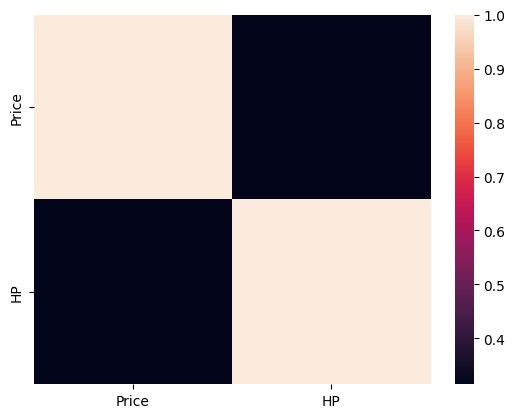

In [ ]:
sns.heatmap(corre)

#2.Splitting the dataset into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100) #30% for test data and 70% for training data

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1005, 11)
(431, 11)
(1005,)
(431,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression() #attaching model to the lr

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Intercept:", lr.intercept_)
print("Coefficients:",lr.coef_)

Intercept: -23824.060195120954
Coefficients: [-1.13918387e+02 -1.57719082e-02  4.39266835e+00 -8.26417328e+01
 -6.88984652e-02 -1.48492889e+02 -2.55795385e-13  6.33834763e+02
  3.47672365e+01 -4.52104860e+02  2.18084935e+03]


In [ ]:
#check whether the model  training is working or not
y_pred_train=lr.predict(X_train)
y_pred_train

array([11110.26767435,  8505.61565462,  9283.03670212, ...,
       13095.0603059 , 15940.22838203,  9430.0255496 ])

In [ ]:
#we can either train the data with r2 score also
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train,y_pred_train)

0.8827359996736777

In [ ]:
#0.8 is a better model
#the r2 score closer to 1 is represented as better model
#close to 0 is bad model


In [ ]:
#now test the model
y_pred_test=lr.predict(X_test)
y_pred_test


array([16064.69185995,  9823.04942485, 12783.02057202, 10195.99593683,
        8363.09310206,  9363.02920468, 13059.18131534,  5380.02343888,
       13722.4936173 ,  8292.73040889, 13897.44190814,  8933.29593305,
       11889.09396125,  7436.54395144, 17267.84064325,  8452.09314864,
       13890.8579877 , 16196.66605838, 17186.80540065,  9423.63216612,
       11468.97860122,  8778.65452854, 11133.68257077, 10141.87405175,
        7986.06106903,  9725.76281034,  8075.06931268,  9448.59228989,
       10999.91086309,  7668.68510732,  8510.63554521, 13898.95180057,
        8590.89046713, 18635.69580449, 10446.32134746,  9040.60927041,
        5974.95959411,  7659.43181841, 11213.98439007, 11236.67915131,
        7964.57853722,  8181.43564298,  8827.44030423, 14319.03657515,
        9803.42368626,  9613.32340289, 12039.68886218,  7113.33251622,
       11108.56125581, 14973.80553814, 10266.77810881, 13113.77996636,
       11727.02918313, 12380.6035404 , 18768.97134483, 10484.25847924,
      

In [ ]:
r2_score(y_test,y_pred_test)

0.77392292006603

In [ ]:
#0.7 r2 score is not a bad model i.e..,77%

#3.Build MLR model using the training dataset. Interpret the coefficients of the model. Build 3 models

In [ ]:
# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)

print("\n Model 1 ")
for feature, coef in zip(X_train.columns, model1.coef_):
 print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model1.intercept_:.2f}")
print(f"R² Score on Test Set: {model1.score(X_test, y_test):.3f}")


 Model 1 
Age: -113.92
KM: -0.02
HP: 4.39
Automatic: -82.64
cc: -0.07
Doors: -148.49
Cylinders: -0.00
Gears: 633.83
Weight: 34.77
Fuel_Type_Diesel: -452.10
Fuel_Type_Petrol: 2180.85
Intercept: -23824.06
R² Score on Test Set: 0.774


In [ ]:
# Model 2: Only Age and KM
X2_train = X_train[['Age', 'KM']]
X2_test = X_test[['Age', 'KM']]
model2 = LinearRegression()
model2.fit(X2_train, y_train)

LinearRegression()

In [ ]:
print("\n Model 2 (Age & KM):")
for feature, coef in zip(X2_train.columns, model2.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model2.intercept_:.2f}")
print(f"R² Score on Test Set: {model2.score(X2_test, y_test):.3f}")


 Model 2 (Age & KM):
Age: -155.08
KM: -0.02
Intercept: 20628.32
R² Score on Test Set: 0.801


In [ ]:
# Model 3: Age, KM, and Weight
X3_train = X_train[['Age', 'KM', 'Weight']]
X3_test = X_test[['Age', 'KM', 'Weight']]
model3 = LinearRegression()
model3.fit(X3_train, y_train)


LinearRegression()

In [ ]:
print("\n Model 3 (Age, KM & Weight):")
for feature, coef in zip(X3_train.columns, model3.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model3.intercept_:.2f}")
print(f"R² Score on Test Set: {model3.score(X3_test, y_test):.3f}")


 Model 3 (Age, KM & Weight):
Age: -112.54
KM: -0.03
Weight: 23.80
Intercept: -6603.66
R² Score on Test Set: 0.822


#4. Evaluating Different metrics on testing dataset


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

In [ ]:
# Print results
print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

Model Evaluation Metrics:
R² Score: 0.774
MAE (Mean Absolute Error): 1016.48
MSE (Mean Squared Error): 2845134.50
RMSE (Root Mean Squared Error): 1686.75


In [ ]:
#Lower MAE, MSE, RMSE: Better model performance

#5.Apply Lasso and Ridge methods on the model.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=1)

In [ ]:
lasso.fit(X_train,y_train)


Lasso(alpha=1)

In [ ]:
lasso.fit(X_test,y_test)

Lasso(alpha=1)

In [ ]:
lasso.score(X_train,y_train) #the lasso score for training data is 58%

0.5864624557658342

In [ ]:
lasso.score(X_test,y_test) #the lasso score for testing data is 86%

0.8625726964708373

In [ ]:
#for best alpha we can use cross validation
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:

lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0, 10])
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[0.01, 0.1, 1.0, 10])

In [ ]:
print("Best alpha for Lasso:", lasso_cv.alpha_)

Best alpha for Lasso: 10.0


In [ ]:
#the Lasso gave the accuracy of 86% with the alpha value 10

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=1)


In [ ]:
ridge.fit(X_train,y_train)


Ridge(alpha=1)

In [ ]:
ridge.fit(X_test,y_test)

Ridge(alpha=1)

In [ ]:
ridge.score(X_train,y_train) #the ridge score for training data is 68%

0.6842821446859828

In [ ]:
ridge.score(X_test,y_test)#the ridge score for training data is 86%

0.8621324696211828

In [ ]:
# for best alpha
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10])
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=[0.01, 0.1, 1.0, 10])

In [ ]:
print("Best alpha for Ridge:", ridge_cv.alpha_)

Best alpha for Ridge: 10.0


#Interview questions

##1.What is Normalization & Standardization and how is it helpful?
Normalization and Standardization are techniques used in feature scaling, a data preprocessing step in machine learning. They are used to bring all features to a similar scale, which helps algorithms perform better and converge faster.

###Normalization
Purpose: To rescale the values of a feature to a fixed range, typically [0, 1].

How: Each data point is adjusted based on the minimum and maximum of that feature.

Use case: Suitable when the data does not follow a normal distribution and models that rely on distance metrics (e.g., k-NN, SVM).

Formula:Xnorm=X-Xmin/Xmax-Xmin


### Standardization
Purpose: To transform features so that they have a mean of 0 and a standard deviation of 1.

How: Each data point is centered by subtracting the mean and scaled by dividing by the standard deviation.

Use case: Ideal when the data follows a Gaussian (normal) distribution, and for models like linear regression, logistic regression, and PCA.

Formula:

Xstd=X-𝜇/σ
where ,μ is the mean and σ is the standard deviation.

##2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when independent variables are highly correlated, which can make regression coefficients unstable and hard to interpret.

### Common Techniques to Address It:
Remove correlated features - Drop one of the variables causing multicollinearity.

Use PCA - Transforms features into uncorrelated components.

Apply Ridge or Lasso Regression -Regularization methods that reduce the impact of multicollinearity.

Check Variance Inflation Factor (VIF) -Identify and remove features with high VIF.

Combine features -Merge correlated variables into one.

These techniques improve model reliability and interpretability.